In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [12]:
data_shopping = pd.read_csv("bigmart.train.csv")

In [13]:
data_shopping

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
data = data_shopping.copy()

In [15]:
data.columns = data.columns.str.lower()

In [16]:
(data.isnull().sum()/len(data))*100

item_identifier               0.000000
item_weight                  17.165317
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.276428
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales             0.000000
dtype: float64

In [17]:
group_mean_weight = data.pivot_table(index = ["item_type"], values = "item_weight", aggfunc = [np.mean])

In [18]:
group_mean_weight

,mean
,item_weight
item_type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328


In [19]:
mean_weight = group_mean_weight.iloc[:,[0][0]]

In [20]:
mean_weight


item_type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: (mean, item_weight), dtype: float64

In [21]:
def missing_value(cols):
    item_type = cols[0]
    item_weight = cols[1]
    if pd.isnull(item_weight):
        if item_type == "Baking Goods":
            return 12.227
        elif item_type == "Breads":
            return 11.347
        elif item_type == "Breakfast":
            return 12.768
        elif item_type == "Canned":
            return 12.30
        elif item_type == "Dairy":
            return 13.42
        elif item_type == "Frozen Foods":
            return 12.867061
        elif item_type == "Fruits and Vegetables":
            return 13.224769
        elif item_type == "Hard Drinks":
            return 11.400328
        elif item_type == "Health and Hygiene":
            return 13.142314
        elif item_type == "Household":
            return 13.384736
        elif item_type == "Meat":
            return 12.817344
        elif item_type == "Others":
            return 13.853285
        elif item_type == "Seafood":
            return 12.552843
        elif item_type == "Snack Foods":
            return 12.987880
        elif item_type == "Soft Drinks":
            return 11.847460
        elif item_type == "Starchy Foods":
            return 13.690731
    return item_weight 

In [22]:
data["item_weight"] = data[["item_type","item_weight"]].apply(missing_value, axis = 1)


In [23]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

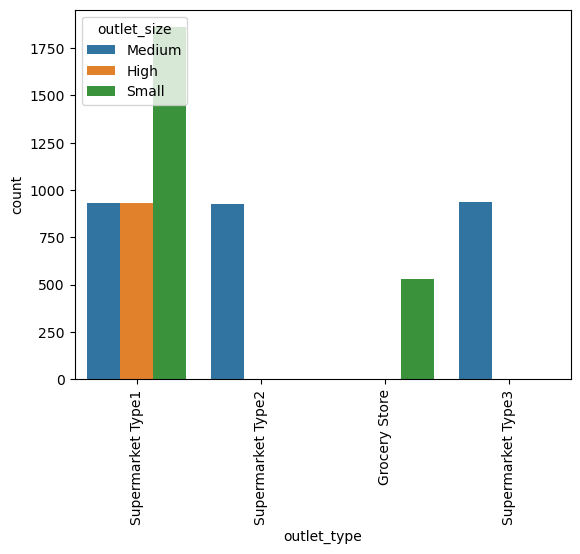

In [24]:
sns.countplot(data = data, x = "outlet_type",hue = "outlet_size")
plt.xticks(rotation =90)

In [25]:
def impute_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size    

In [26]:
data["outlet_size"] = data[["outlet_size","outlet_type"]].apply(impute_size, axis = 1)

In [27]:
data

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [28]:
data["item_fat_content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [29]:
data["item_fat_content"] = data["item_fat_content"].str.replace("LF","low fat").str.replace("reg","regular").str.lower()

In [30]:
data["item_fat_content"].unique()

array(['low fat', 'regular'], dtype=object)

In [31]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
mean_visibility = data.pivot_table(index = "item_identifier",  values = "item_visibility")

In [33]:
data.loc[(data["item_visibility"] == 0.0), "item_visibility"] = data.loc[(data["item_visibility"] == 0.0), "item_identifier"].apply(lambda x : mean_visibility.at[x, "item_visibility"])

In [34]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:xlabel='outlet_identifier', ylabel='item_outlet_sales'>

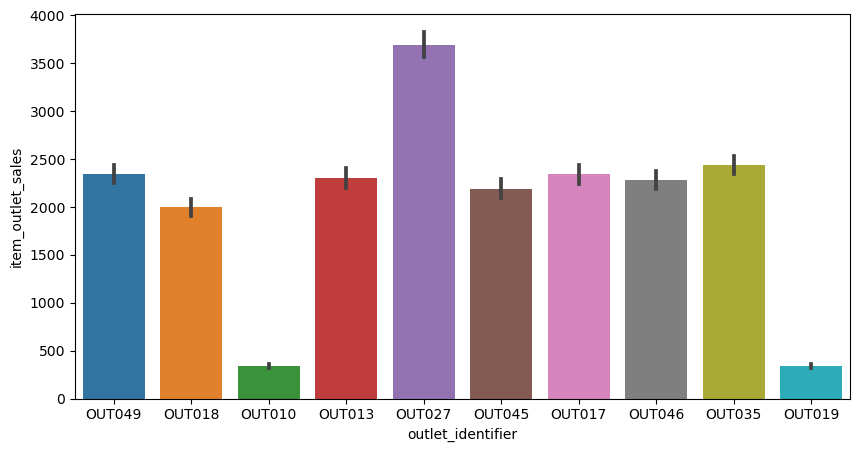

In [35]:
plt.figure(figsize = (10,5))
sns.barplot(data = data, x = "outlet_identifier", y = "item_outlet_sales")

Text(0, 0.5, 'Mean of Item outlet sales')

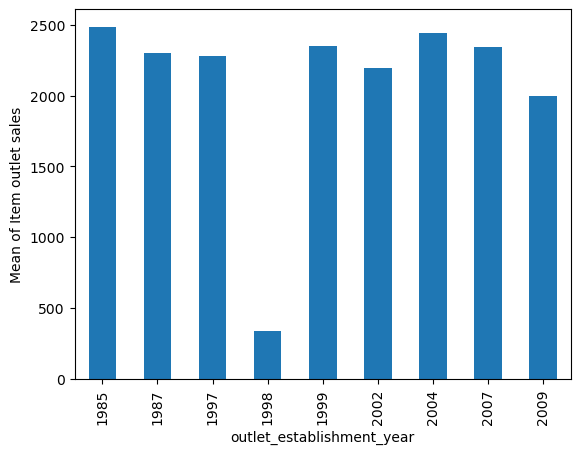

In [36]:
data.groupby("outlet_establishment_year")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

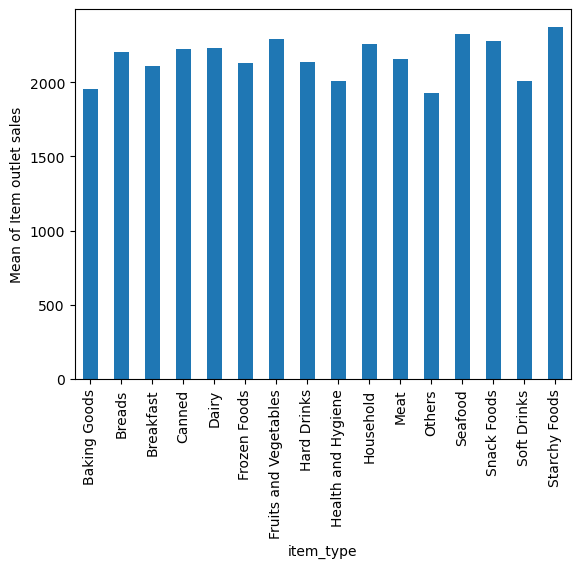

In [37]:
data.groupby("item_type")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

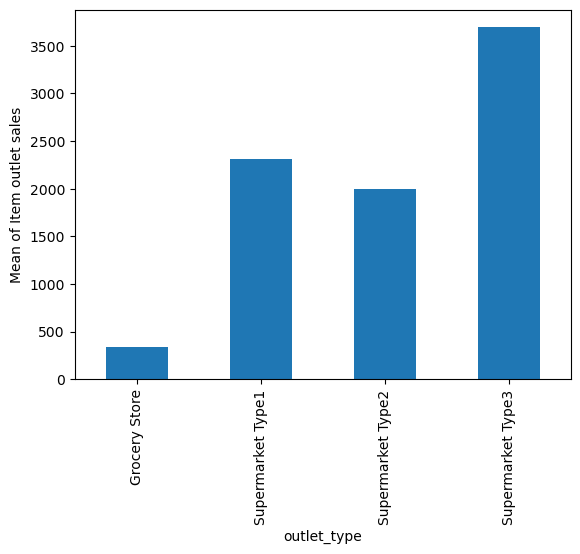

In [38]:
data.groupby("outlet_type")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

In [39]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
cols = ['item_identifier', 'item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type']

In [41]:
for i in cols:
    x = data[i].value_counts().to_dict()
    data[i] = data[i].map(x)

In [42]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,8,9.30,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.50,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.20,3006,0.015274,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.93,5517,0.008082,910,53.8614,932,932,932,3350,5577,994.7052


In [43]:
new_data = data.copy()

<AxesSubplot:>

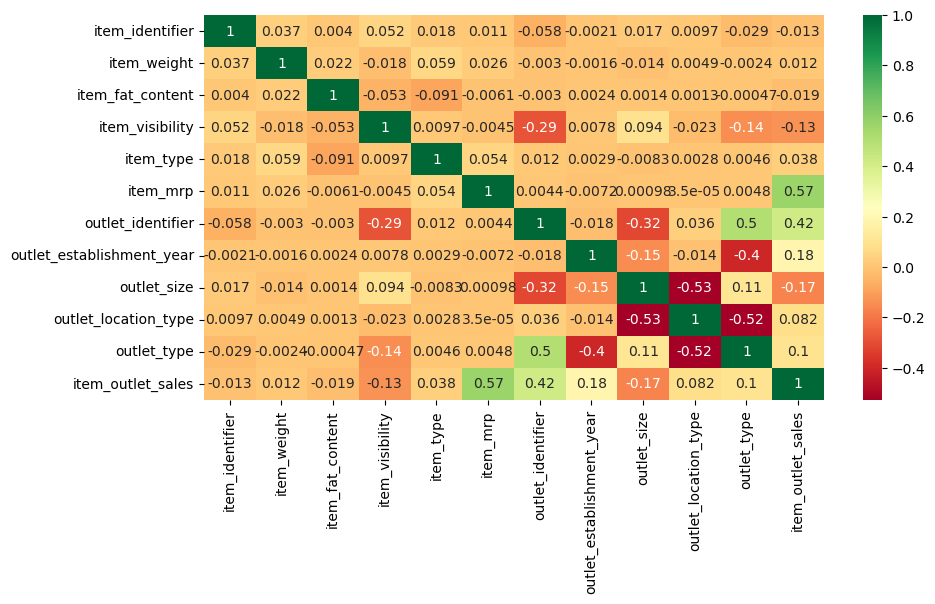

In [44]:
plt.figure(figsize = (10,5))
sns.heatmap(new_data.corr(),cmap = "RdYlGn", annot = True)

In [45]:
new_data =new_data.drop(["item_weight","item_identifier", "item_type", "item_fat_content","outlet_location_type"], axis = 1)

In [46]:
new_data.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,0.016047,249.8092,930,930,2793,5577,3735.1380
1,0.019278,48.2692,928,928,2793,928,443.4228
2,0.016760,141.6180,930,930,2793,5577,2097.2700
3,0.015274,182.0950,555,555,4798,1083,732.3800
4,0.008082,53.8614,932,932,932,5577,994.7052


In [47]:
new_data.skew()

item_visibility              1.233294
item_mrp                     0.127202
outlet_identifier           -2.244651
outlet_establishment_year    0.936439
outlet_size                 -0.803018
outlet_type                 -0.650418
item_outlet_sales            1.177531
dtype: float64

C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

<AxesSubplot:xlabel='item_outlet_sales', ylabel='Density'>

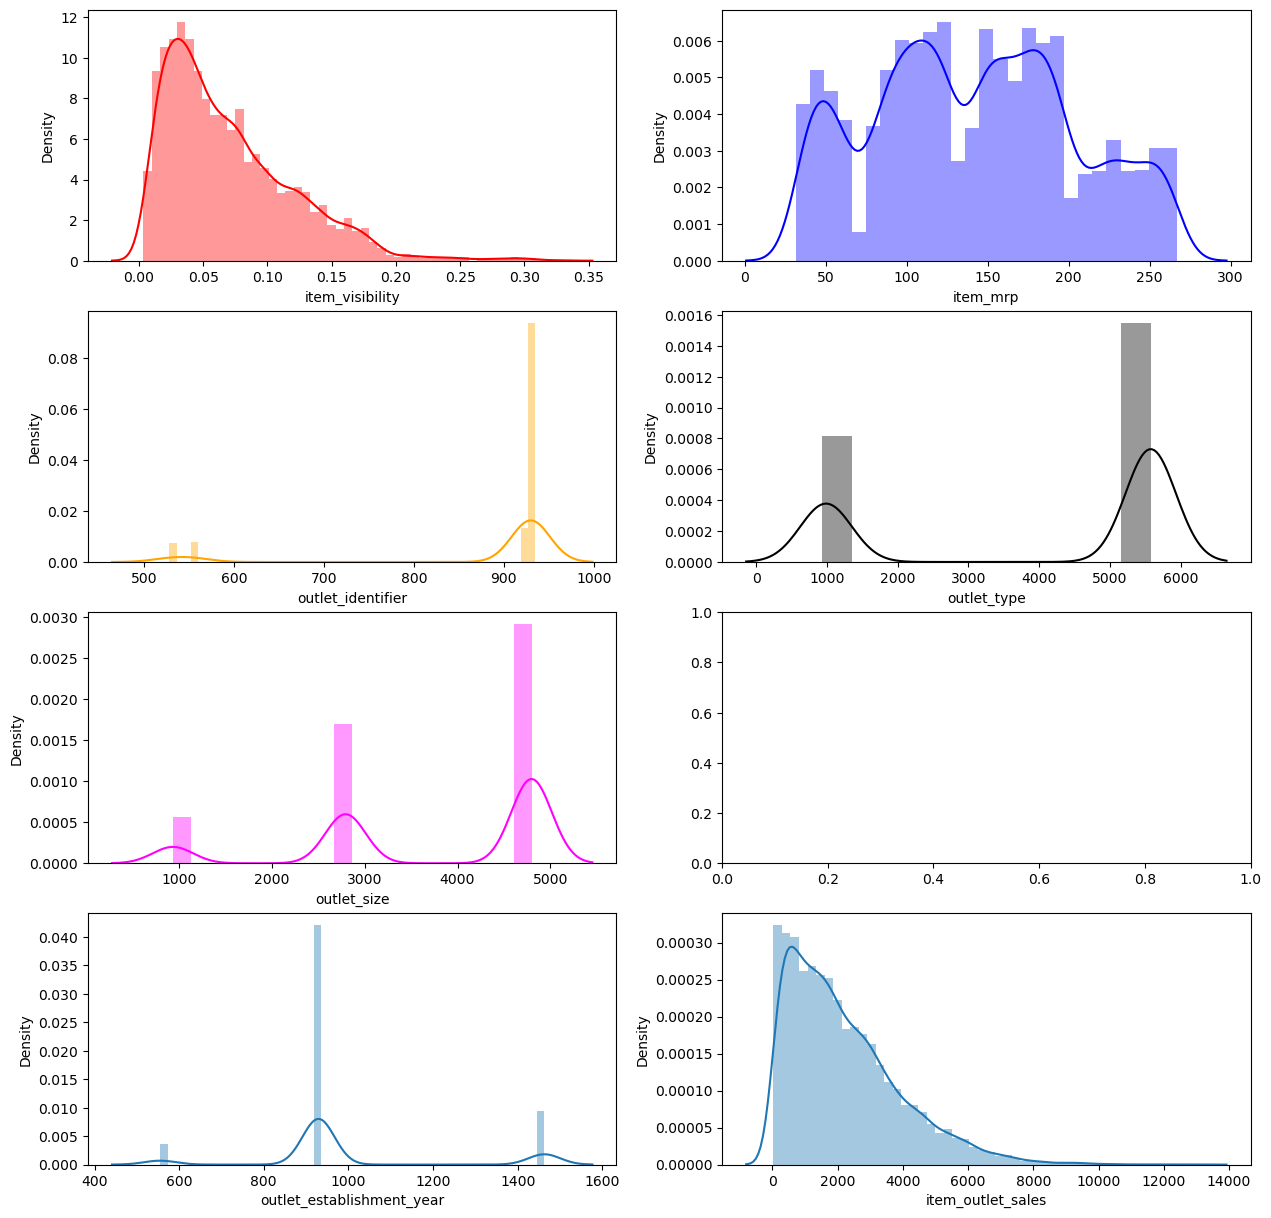

In [48]:
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(new_data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_data["outlet_establishment_year"], kde =True, ax=ax[3,0])
sns.distplot(new_data["item_outlet_sales"], kde =True, ax=ax[3,1])

In [49]:
new_data.columns

Index(['item_visibility', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_type',
       'item_outlet_sales'],
      dtype='object')

In [50]:
for i in new_data.columns:
    new_data[i] = np.log(new_data[i])

In [51]:
new_data.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,-4.132215,5.520697,6.835185,6.835185,7.934872,8.626406,8.225540
1,-3.948780,3.876794,6.833032,6.833032,7.934872,6.833032,6.094524
2,-4.088756,4.953133,6.835185,6.835185,7.934872,8.626406,7.648392
3,-4.181625,5.204529,6.318968,6.318968,8.475954,6.987490,6.596300
4,-4.818097,3.986414,6.837333,6.837333,6.837333,8.626406,6.902446


C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

<AxesSubplot:xlabel='item_outlet_sales', ylabel='Density'>

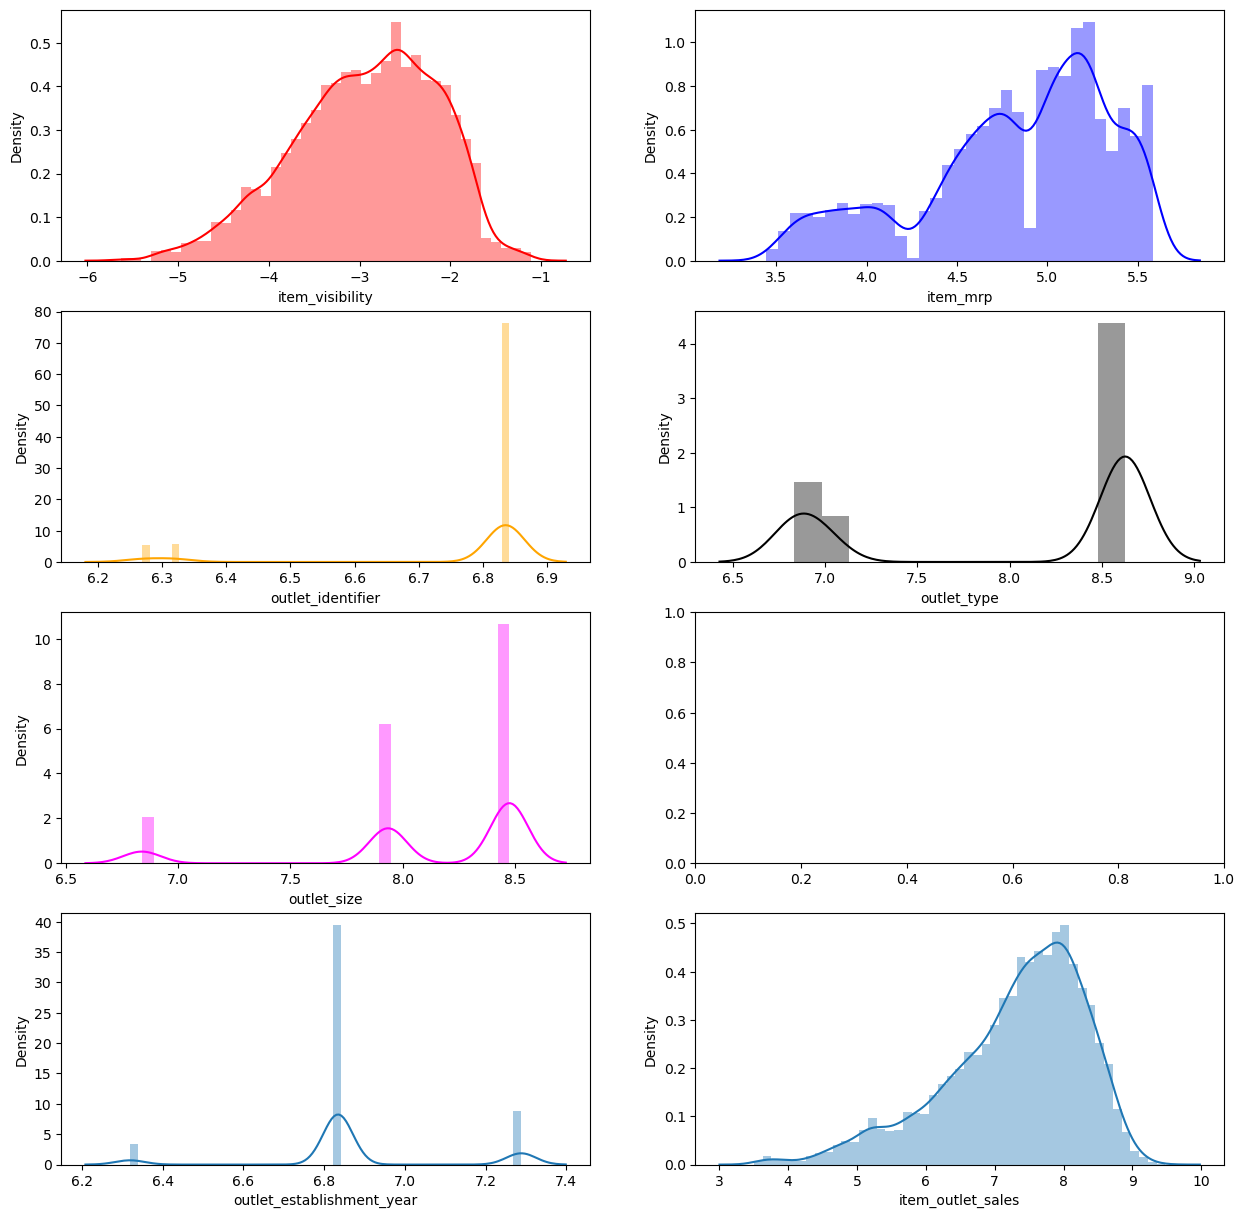

In [52]:
# After Transformation
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(new_data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_data["outlet_establishment_year"], kde =True, ax=ax[3,0])
sns.distplot(new_data["item_outlet_sales"], kde =True, ax=ax[3,1])

In [53]:
new_data.skew()

item_visibility             -0.429840
item_mrp                    -0.735795
outlet_identifier           -2.249965
outlet_establishment_year    0.026025
outlet_size                 -1.539875
outlet_type                 -0.657515
item_outlet_sales           -0.887753
dtype: float64

In [54]:
#Independent Variables:
x = new_data.drop("item_outlet_sales", axis = 1) 

#Depenedent Variables 
y = new_data["item_outlet_sales"].values.reshape(-1,1)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

In [56]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [57]:
y_pred = regressor.predict(x_test)

In [58]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.7570281460077116

In [59]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,  y_pred))
rmse

0.5197787447163863

In [60]:
residue_lr = y_test -y_pred

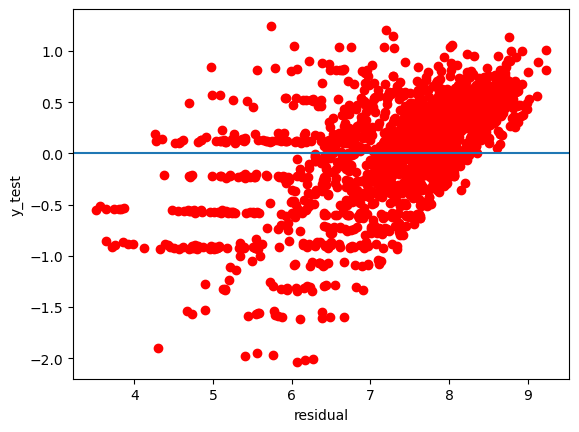

In [61]:
plt.scatter(y_test,residue_lr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

In [63]:
#Importing LASSO AND RIDGE from sklearn library:
#Apply Lasso Regularization Technique
from sklearn.linear_model import Lasso, Ridge
ls = Lasso(alpha = 0.009)
ls.fit(x_train, y_train)

Lasso(alpha=0.009)

In [64]:
#prediction by LASSO model
ls_pred = ls.predict(x_test)

In [65]:
r2_score(y_test,ls_pred)

0.7468491769184081

In [66]:
rmse_lasso = sqrt(mean_squared_error(y_test, ls_pred))
rmse_lasso

0.530554746291775

In [67]:
lasso_coeff = pd.Series(ls.coef_, index =x.columns) 

<AxesSubplot:>

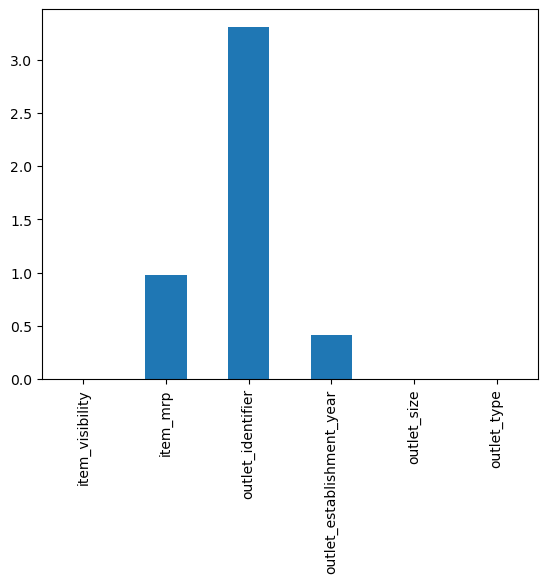

In [68]:
lasso_coeff.plot(kind = "bar")

In [69]:
#RESHAPING THE PREDICTED VALUES
ls_pred= ls_pred.reshape(-1,1)

ls_pred

array([[7.86649549],
       [7.45465459],
       [6.52762899],
       ...,
       [7.92350261],
       [7.03867668],
       [6.64322991]])

In [70]:
residue = y_test - ls_pred

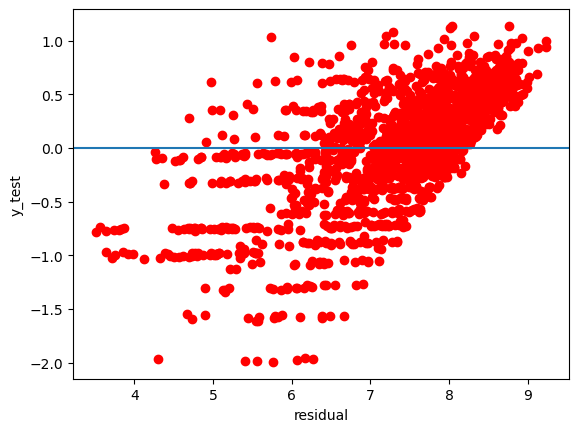

In [71]:
plt.scatter(y_test.reshape(-1,1),residue, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

In [72]:
rr = Ridge(alpha = 0.009)
rr.fit(x_train, y_train)

Ridge(alpha=0.009)

In [73]:
rr_pred = rr.predict(x_test)

In [74]:
r2_score(y_test, y_pred)

0.7570281460077116

In [75]:
rmse_ridge = sqrt(mean_squared_error(y_test, rr_pred))
rmse_ridge

0.5197810776520827

In [76]:
test_data = pd.read_csv('bigmart.test.csv')

In [77]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [78]:
test = test_data.copy()

In [79]:
test.columns = test.columns.str.lower()

In [80]:
(test.isnull().sum()/len(test))*100

item_identifier               0.000000
item_weight                  17.180074
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.269671
outlet_location_type          0.000000
outlet_type                   0.000000
dtype: float64

In [81]:
group_mean = test.pivot_table(index = ["item_type"], values = "item_weight", aggfunc = [np.mean])


In [82]:
group_mean

,mean
,item_weight
item_type,
Baking Goods,12.272418
Breads,10.866799
Breakfast,13.759603
Canned,12.393565
Dairy,12.955040
Frozen Foods,12.101543
Fruits and Vegetables,13.146659
Hard Drinks,11.844417


In [83]:
mean_weigh = group_mean.iloc[:,[0][0]]

In [84]:
mean_weigh

item_type
Baking Goods             12.272418
Breads                   10.866799
Breakfast                13.759603
Canned                   12.393565
Dairy                    12.955040
Frozen Foods             12.101543
Fruits and Vegetables    13.146659
Hard Drinks              11.844417
Health and Hygiene       13.216929
Household                13.270504
Meat                     12.702148
Others                   14.009725
Seafood                  13.241136
Snack Foods              12.684256
Soft Drinks              11.691965
Starchy Foods            13.618247
Name: (mean, item_weight), dtype: float64

In [85]:
def missing_value1(cols):
    item_type = cols[0]
    item_weight =cols[1]
    if pd.isnull(item_weight):
        if item_type == "Baking Goods":
            return 12.277
        elif item_type == "Breads":
            return 10.86
        elif item_type == "Breakfast":
            return  13.759603
        elif item_type == "Canned":
            return 12.393565
        elif item_type == "Dairy":
            return 12.955040
        elif item_type == "Frozen Foods":
            return  12.101543
        elif item_type == "Fruits and Vegetables":
            return 13.146659
        elif item_type == "Hard Drinks":
            return 11.844417
        elif item_type == "Health and Hygiene":
            return 13.216929
        elif item_type == "Household":
            return 13.270504
        elif item_type == "Meat":
            return 12.702148
        elif item_type == "Others":
            return 14.009725
        elif item_type == "Seafood":
            return 13.241136
        elif item_type == "Snack Foods":
            return 12.684256
        elif item_type == "Soft Drinks":
            return 11.691965
        elif item_type == "Starchy Foods":
            return 13.618247
    return item_weight  

In [86]:
test["item_weight"] = test[["item_type","item_weight"]].apply(missing_value1, axis = 1)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Grocery Store'),
  Text(2, 0, 'Supermarket Type3'),
  Text(3, 0, 'Supermarket Type2')])

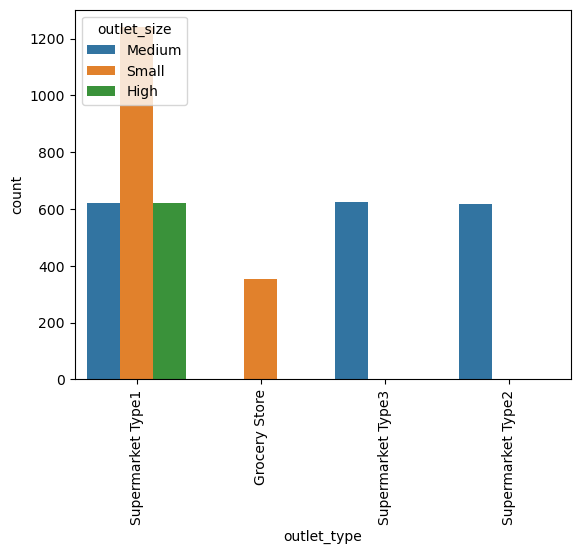

In [87]:
sns.countplot(data = test, x = "outlet_type",hue = "outlet_size")
plt.xticks(rotation =90)

In [88]:
def impute_size1(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size    

In [89]:
test["outlet_size"] = test[["outlet_size","outlet_type"]].apply(impute_size1, axis = 1)

In [90]:
test["item_fat_content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [91]:
test["item_fat_content"] = test["item_fat_content"].str.replace("LF", "low fat").str.replace("reg", "regular").str.lower()

In [92]:
test["item_fat_content"].unique()

array(['low fat', 'regular'], dtype=object)

In [93]:
mean_item_visibility = test.pivot_table(index = "item_identifier",  values = "item_visibility")

In [94]:
mean_item_visibility.head()

,item_visibility
item_identifier,
DRA12,0.040901
DRA24,0.040009
DRA59,0.128046
DRB01,0.078302
DRB13,0.005294


In [95]:
test_d = test.copy()

In [96]:
columns = ['item_identifier', 'item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type']
for i in columns:
    x  = test_d[i].value_counts().to_dict()
    test_d[i] = test_d[i].map(x)

In [97]:
test_d.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,7,20.75000,3668,0.007565,789,107.8622,620,620,1862,1592,3717
1,6,8.30000,2013,0.038428,454,87.3198,617,617,3198,1856,3717
2,4,14.60000,3668,0.099575,111,241.7538,370,370,3198,2233,722
3,3,7.31500,3668,0.015388,789,155.0340,617,617,3198,1856,3717
4,4,12.95504,2013,0.118599,454,234.2300,624,976,1862,2233,624


In [98]:
new_test_data = test_d.copy()

In [99]:
new_test_data =new_test_data.drop(["item_weight","item_identifier", "item_type", "item_fat_content","outlet_location_type"], axis = 1)

In [100]:
new_test_data.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type
0,0.007565,107.8622,620,620,1862,3717
1,0.038428,87.3198,617,617,3198,3717
2,0.099575,241.7538,370,370,3198,722
3,0.015388,155.0340,617,617,3198,3717
4,0.118599,234.2300,624,976,1862,624


In [101]:
#CHECKING THE SKEWNESS OF THE TEST DATA
new_test_data.skew()

item_visibility              1.238312
item_mrp                     0.136182
outlet_identifier           -2.243972
outlet_establishment_year    0.940664
outlet_size                 -0.803617
outlet_type                 -0.650194
dtype: float64

C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

<AxesSubplot:xlabel='outlet_establishment_year', ylabel='Density'>

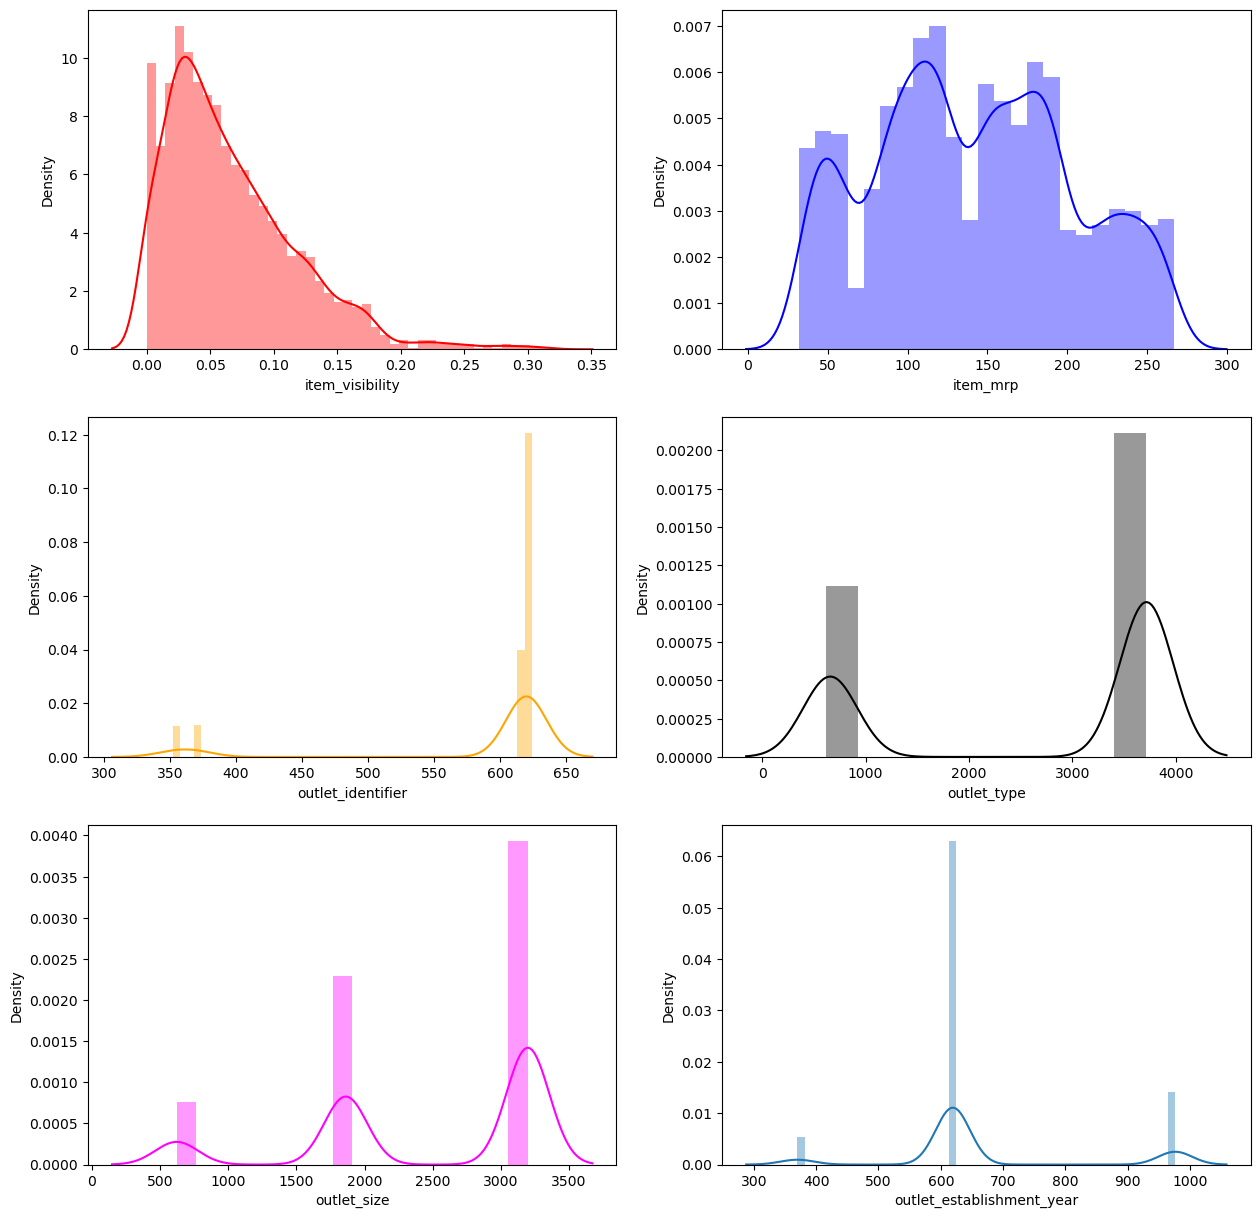

In [102]:
#VISUALIZING THE SKEWNESS OF THE DATASET
# Before Transformation
fig, ax = plt.subplots(3,2,figsize = (15,15))
sns.distplot(new_test_data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_test_data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_test_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_test_data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_test_data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_test_data["outlet_establishment_year"], kde =True, ax=ax[2,1])

In [103]:
new_test_data.columns

Index(['item_visibility', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_type'],
      dtype='object')

In [104]:
for i in new_test_data.columns:
    new_test_data[i] =np.log(new_test_data[i]+1)

C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\d jashwanth sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

<AxesSubplot:xlabel='outlet_establishment_year', ylabel='Density'>

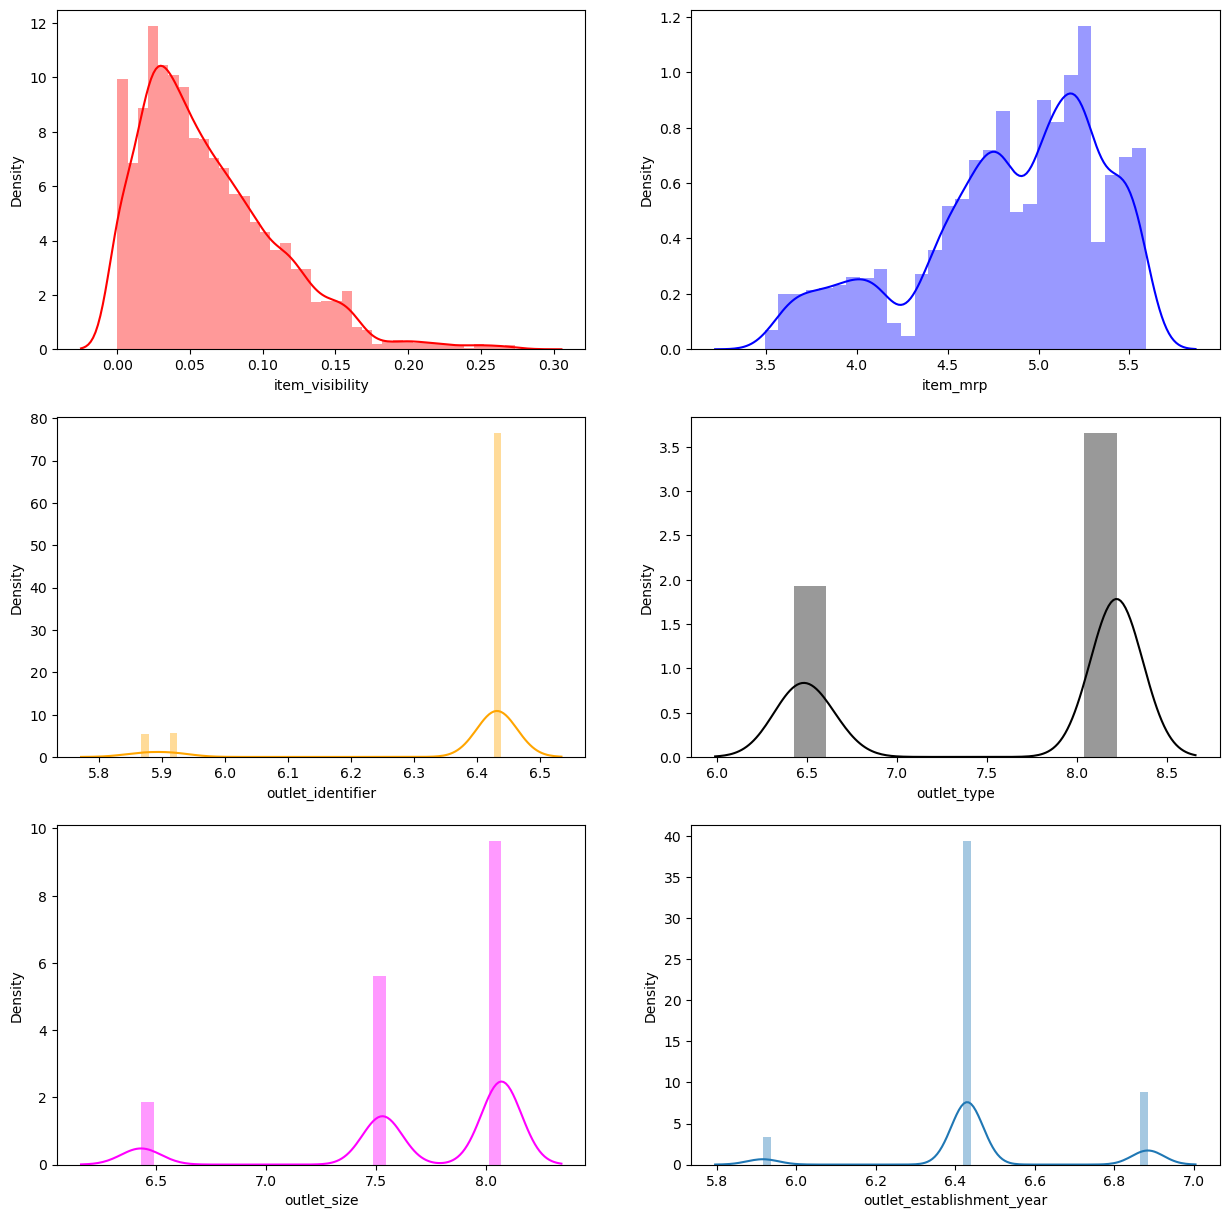

In [105]:
#After Transformation 
fig, ax = plt.subplots(3,2,figsize = (15,15))
sns.distplot(new_test_data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_test_data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_test_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_test_data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_test_data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_test_data["outlet_establishment_year"], kde =True, ax=ax[2,1])

In [106]:
new_test_data.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type
0,0.007536,4.690083,6.431331,6.431331,7.529943,8.220941
1,0.037708,4.480964,6.426488,6.426488,8.070594,8.220941
2,0.094924,5.492048,5.916202,5.916202,8.070594,6.583409
3,0.015271,5.050074,6.426488,6.426488,8.070594,8.220941
4,0.112077,5.460564,6.437752,6.884487,7.529943,6.437752


In [107]:
#Skewness After Transformation:
new_test_data.skew()

item_visibility              1.075093
item_mrp                    -0.714215
outlet_identifier           -2.249508
outlet_establishment_year    0.035052
outlet_size                 -1.540480
outlet_type                 -0.657290
dtype: float64

In [108]:
#Apply Model to the Test Data for Predicting The item Outsale Values:
item_outsale_pred = regressor.predict(new_test_data)

In [109]:
item_outsale_pred

array([[5.67640946],
       [5.46067678],
       [4.38498969],
       ...,
       [5.78283971],
       [6.36494054],
       [5.38430632]])

In [110]:
actual_item_outsale = np.exp(item_outsale_pred+1)

In [111]:
actual_item_outsale

array([[ 793.46502665],
       [ 639.49370755],
       [ 218.10785445],
       ...,
       [ 882.57141188],
       [1579.62149746],
       [ 592.47360083]])

In [112]:
test["item_outlet_sale"] = actual_item_outsale

In [113]:
test

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sale
0,FDW58,20.75000,low fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,793.465027
1,FDW14,8.30000,regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,639.493708
2,NCN55,14.60000,low fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,218.107854
3,FDQ58,7.31500,low fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,1138.258763
4,FDY38,12.95504,regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,2383.376614
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50000,regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,1058.217726
5677,FDD47,7.60000,regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,1291.548794
5678,NCO17,10.00000,low fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,882.571412
5679,FDJ26,15.30000,regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,1579.621497
